<a href="https://colab.research.google.com/github/ShabanaNaik/IBM-Project/blob/main/Graduate_Admission_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_squared_log_error



In [7]:
#Reading the Dataset
data= pd.read_csv(r"/content/Admission_Predict.csv")

## Analysing the Data

In [8]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [10]:
data.shape

(400, 9)

In [11]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
ids = data["Serial No."]
data[ids.isin(ids[ids.duplicated()])].sort_values("Serial No.")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Observations on data types of the features :

* All the data is in numeric format.
* All the features have 400 observations as non null. This gives a good confidance to the data for outlier handling.












In [14]:
# Dropping Serial No. from the data 
data = data.drop(["Serial No."], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
data.nunique()


GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

### Observations:


*From above, we can see that the 'Research' column contains only two values (0 and 1). This means that it is a boolean column. It does not provide us information about the kind of research done or the quantity of research done, it just tells us whether a student has done some research or not.



In [49]:
# Checking for null value
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


## Exploratory Data Analysis

* To understand our data, we need to carry out some Exploratory Data Analysis. This will help us in understanding what universities look for in a candidate, and what a candidate must do to increase their chances of getting into their dream university.

In [16]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.81,11.47,290.00,308.00,317.00,325.00,340.00
TOEFL Score,400.0,107.41,6.07,92.00,103.00,107.00,112.00,120.00
University Rating,400.0,3.09,1.14,1.00,2.00,3.00,4.00,5.00
SOP,400.0,3.40,1.01,1.00,2.50,3.50,4.00,5.00
LOR,400.0,3.45,0.90,1.00,3.00,3.50,4.00,5.00
CGPA,400.0,8.60,0.60,6.80,8.17,8.61,9.06,9.92
Research,400.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
Chance of Admit,400.0,0.72,0.14,0.34,0.64,0.73,0.83,0.97


### Observations from 5 point description of data :


* Since all the features are numeric in nature, simply using count, mean, std-dev, minimum, maximum, 25th percentile, 50th percentile (median) and 75th percentile will be enough to understand the data.

* GRE Score: Has observed mean score at 316.81 out of 340 with standard deviation of 11.47. For the same minimum score observed at 290/340 and maximum score at 340/340. And and range 25th to 75th percentile is [308 - 325].

* TOEFL Score: Has observed mean score at 107.41/120 with standard deviation of 6.07. For the same minimum score observed at 92/120 and maximum score at 120/120. And and range 25th to 75th percentile is [103 - 112].

* University Rating: Average rating of universities is 3.40 with a standard deviation 1.14. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5. The 25th and 75th percentile are at 2 and 4 respectively. *

* SOP Statement of Purpose : Average rating of SOP is 3.37 with a standard deviation 1.01. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 2.50 and 4 respectively. *

* LOR Letter of Recommendation Strength : Average rating of LOR is 3.45 with a standard deviation 0.90. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 3 and 4 respectively. *

* CGPA : Average CGPA score is 8.60/10 with a standard deviation 0.60. For the same minimum score observed at 6.80/10 and maximum score at 9.92/10. And the range of 25th to 75th percentile is [8.17- 9.06].

* Research : This is a binary status feature with value 0 or 1. The only input we can take from this is mean is 0.55, suggesting 55% has opted in research.

* Chance of Admit : The mean value is observed at 0.72 with a standard deviation of 0.14. For the same minimum is observed at 0.34 and maximum is observed at 0.97. And the range of 25th and 75th percentile is [0.64-0.83].

Note - Since ratings are fixed range of [1-5] it will be treated as categorical feature for further Explorative analysis.




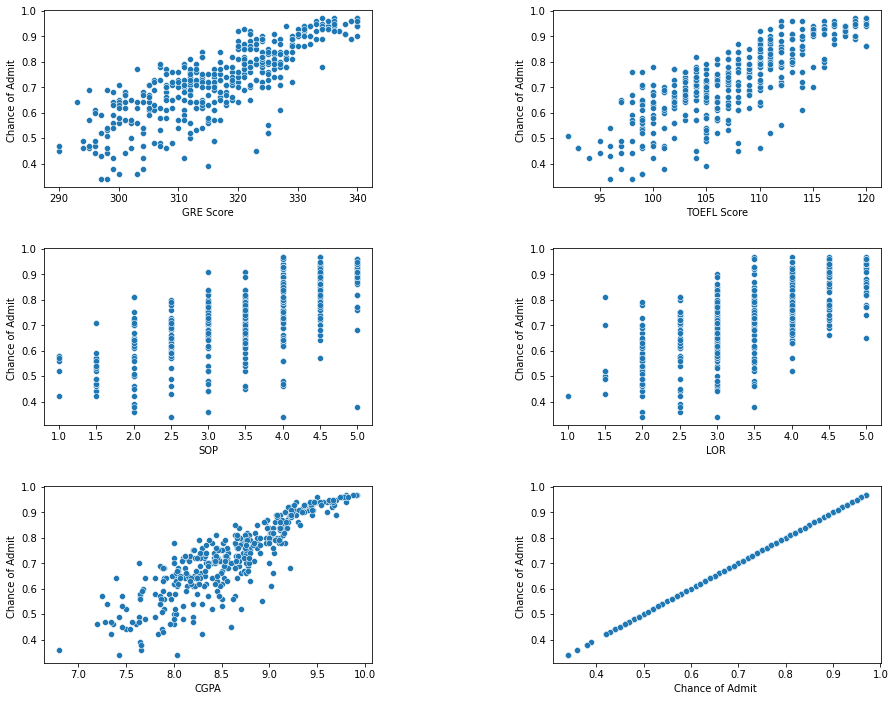

In [37]:
scatter_plots=['GRE Score','TOEFL Score','SOP','LOR ','CGPA','Chance of Admit ']
fig=plt.figure()
fig.set_size_inches(15, 12)
fig.subplots_adjust(hspace=0.35,wspace=0.55)
for i in range(len(scatter_plots)):
  ax=fig.add_subplot(3,2,i+1)
  sns.scatterplot(data=data, x=scatter_plots[i], y='Chance of Admit ') #adding kdeplots
plt.show()

### Observations:
* From the scatter plots, we can see that there is linear relationship between the following variables:

    1. GRE score and Chance of Admit
    2. TOEFL score and Chance of Admit
    3. CGPA and Chance of Admit
* But, it can also be seen that there are outliers who have a low chance of getting admitted despite scoring high on these tests. This tells us that the other factors also play a vital role of assessing a candidate's merit.
* For parameters like SOP, LOR score, the relationship with 'Chance of Admit' looks sort of linear. Since these variables (SOP, LOR) have discrete levels, we can use a box plot to better capture their relationship with 'Chance of Admit'.


 

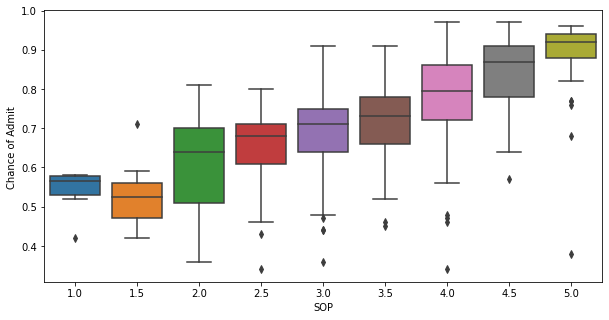

In [38]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='SOP',y='Chance of Admit ',data=data)



### Observations:
* The above boxplot tells us that a good SOP significantly affects the chances of getting admitted into the dream college.

Now, let's look at the boxplot for LOR vs Chance of Admit.

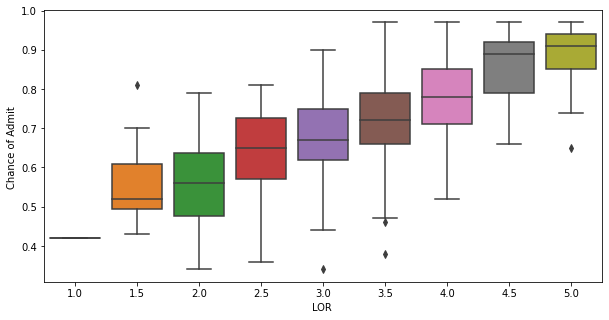

In [39]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='LOR ',y='Chance of Admit ',data=data)

### Observation:
* From the above boxplot, we can see how a good LOR increases the chances of getting admitted.

Finally, we can also look at the correlations between the parameters in our dataset using a heatmap.


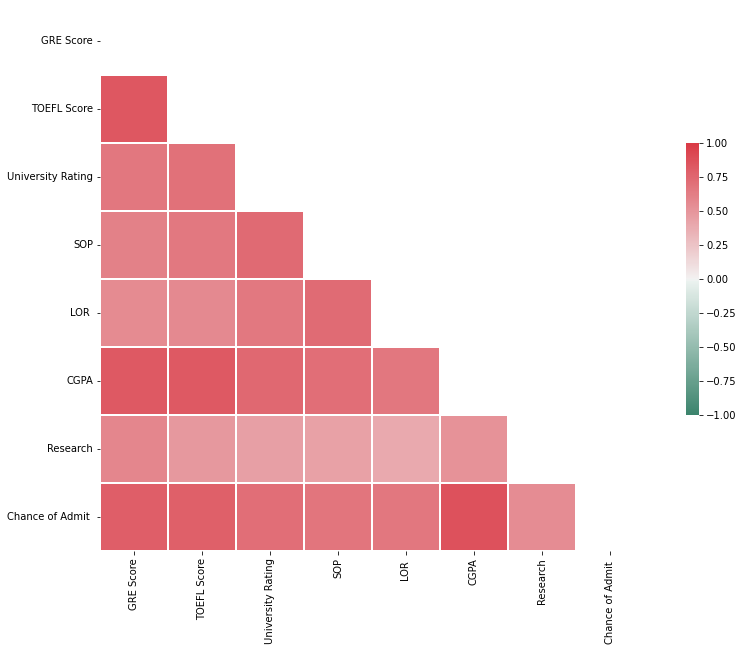

In [51]:
# Heat Map
correlation = data.corr()
mask = np.triu(np.ones_like(correlation,dtype = bool))
f,ax = plt.subplots(figsize = (15,10))
cmap = sns.diverging_palette(159, 10, as_cmap = True)
sns.heatmap(correlation,mask = mask,cmap = cmap,vmax = 1,vmin = -1,center = 0,square = True,linewidths=.5,cbar_kws={'shrink':.5})

* Let us analyze the distribution of candidates chance of admit in the data. Let us see how Uni rating affects chance of admission:

In [59]:
data.groupby('University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


* Average chance of admission of candidates who applied to program with rating 1 is less than that of the candidates who applied to program with higher ratings. 
* Now let us analyze the subjects with more than 83% of chance which is the third quartile of the chance data.


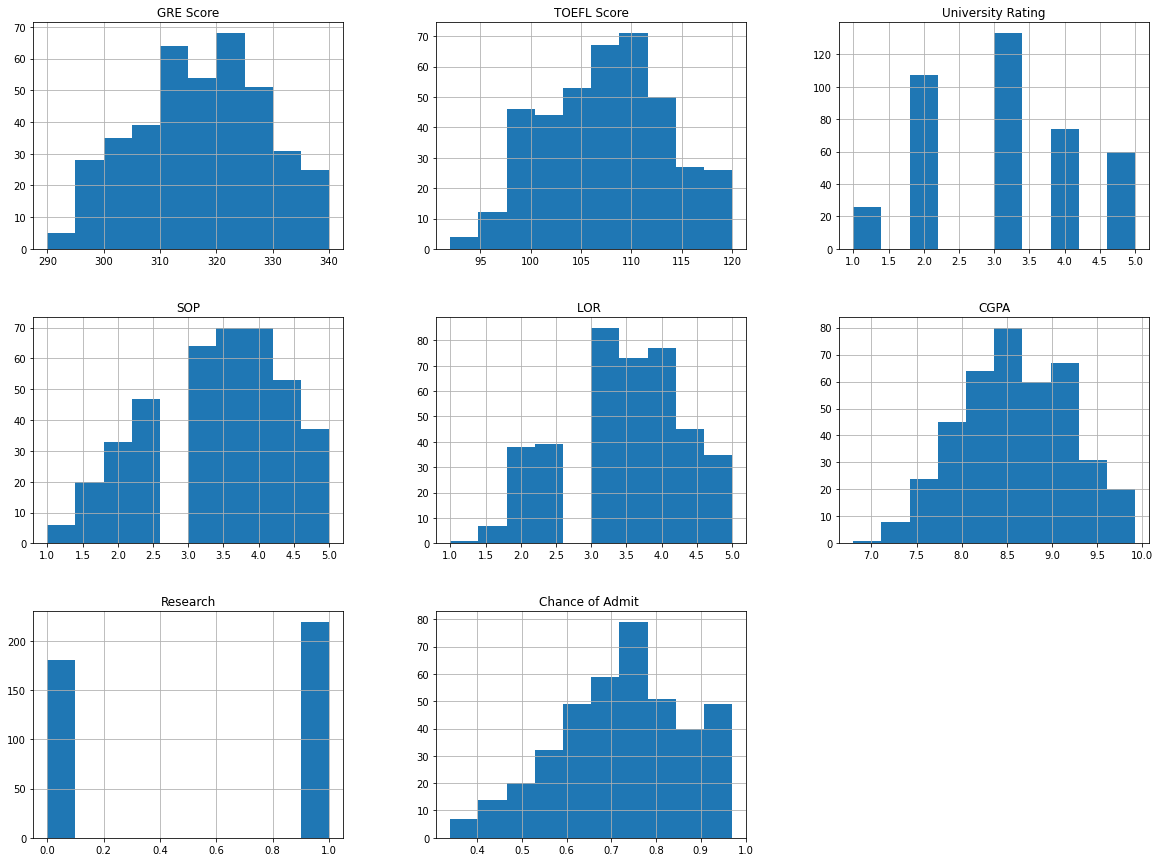

In [62]:
data.hist(bins=10, figsize=(20,15))
plt.show()

In [64]:
from sklearn.utils import shuffle
df_shuffle = shuffle(data, random_state =42)

In [65]:
df_shuffle.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
209,301,104,3,3.5,4.0,8.12,1,0.68
280,311,102,3,4.5,4.0,8.64,1,0.68
33,340,114,5,4.0,4.0,9.60,1,0.90
210,325,108,4,4.5,4.0,9.06,1,0.79
93,301,97,2,3.0,3.0,7.88,1,0.44


In [66]:
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [76]:
data[data['Chance of Admit ']>0.83].groupby('Chance of Admit ').mean()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Chance of Admit,,,,,,,
0.84,324.000000,109.444444,3.444444,3.777778,3.555556,9.038889,1.000000
0.85,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,325.500000,114.750000,4.250000,4.312500,4.437500,9.107500,0.875000
0.87,326.400000,111.400000,4.400000,4.400000,4.200000,9.072000,0.800000
0.88,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,329.111111,113.666667,4.444444,4.333333,4.166667,9.263333,0.888889
0.90,331.000000,116.125000,4.000000,4.562500,4.062500,9.305000,1.000000
0.91,331.714286,114.857143,4.428571,4.285714,4.428571,9.358571,1.000000
0.92,329.833333,115.666667,4.833333,4.500000,4.333333,9.368333,1.000000


**Observations**
* Average CGPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.60.
* Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.


In [71]:
var=data.columns.values.tolist()
y=data['Chance of Admit ']
x=[i for i in var if i not in ['Chance of Admit ']]
x=data[x]

* Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.


In [77]:
data=data.rename(columns={'Chance of Admit ':'chance'})

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)


**Data normalization**

In [79]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
x_train[x_train.columns] = mx.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = mx.transform(x_test[x_test.columns])



* In order to make classification models, outcome of the classification is defined as 'status' which takes value of True for the applicants that have more than 84% chance. 

In [81]:
cy_train=[1 if chance > 0.84 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.84 else 0 for chance in y_test]
cy_test=np.array(cy_test)


## Logistic Regression

In [82]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


LogisticRegression()

Logistic regression accuracy: 0.938
--------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.93      0.76      0.84        17

    accuracy                           0.94        80
   macro avg       0.93      0.87      0.90        80
weighted avg       0.94      0.94      0.94        80



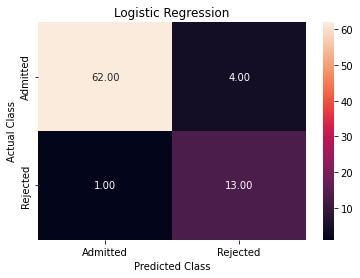

In [86]:
# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')

print(classification_report(cy_test, lr.predict(x_test)))

cy = lr.predict(x_test)

lr_confm = confusion_matrix(cy, cy_test,)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()


## Random Forest Model

Random Forest Accuracy: 0.925
--------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.87      0.76      0.81        17

    accuracy                           0.93        80
   macro avg       0.90      0.87      0.88        80
weighted avg       0.92      0.93      0.92        80



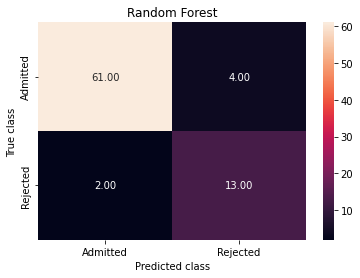

In [88]:
# Fitting random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, rf.predict(x_test)))

cy = rf.predict(x_test)
rf_confm = confusion_matrix(cy, cy_test)
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()


## SVM Model

Support vector machine accuracy: 0.925
--------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        63
           1       0.92      0.71      0.80        17

    accuracy                           0.93        80
   macro avg       0.92      0.85      0.88        80
weighted avg       0.92      0.93      0.92        80



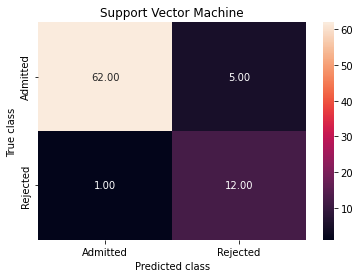

In [90]:
# Fitting support vector machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, svc.predict(x_test)))

cy = svc.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test)
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()

